# Technical validation

This notebook can be used to reproduce figures illustrating technical validation.

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=RuntimeWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn import plotting, datasets, image, glm
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
import nibabel as nib
from nibabel.processing import resample_from_to
import numpy as np
from lib import technical_validation

/Users/egermani/miniforge3/envs/workEnv/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [ ]:
### PATHS TO MODIFY 
data_path = '/Volumes/empenn/egermani/hcp_many_pipelines'
figure_path = '../figures'

In [3]:
# Atlas fetching
atlas_roi = datasets.fetch_atlas_juelich('prob-2mm')
lab =[31,32]
masks = [image.index_img(atlas_roi.maps, lab_i) for lab_i in lab]
mask, mask_right, mask_left = technical_validation.compute_unilateral_masks(masks)

## Figure 1 - Workflow 

/Users/egermani/miniforge3/envs/workEnv/lib/python3.9/site-packages/nilearn/plotting/displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/Users/egermani/miniforge3/envs/workEnv/lib/python3.9/site-packages/nilearn/plotting/displays.py:101: UserWarning: The following kwargs were not used by contour: 'contours'
  im = getattr(ax, type)(data_2d.copy(),


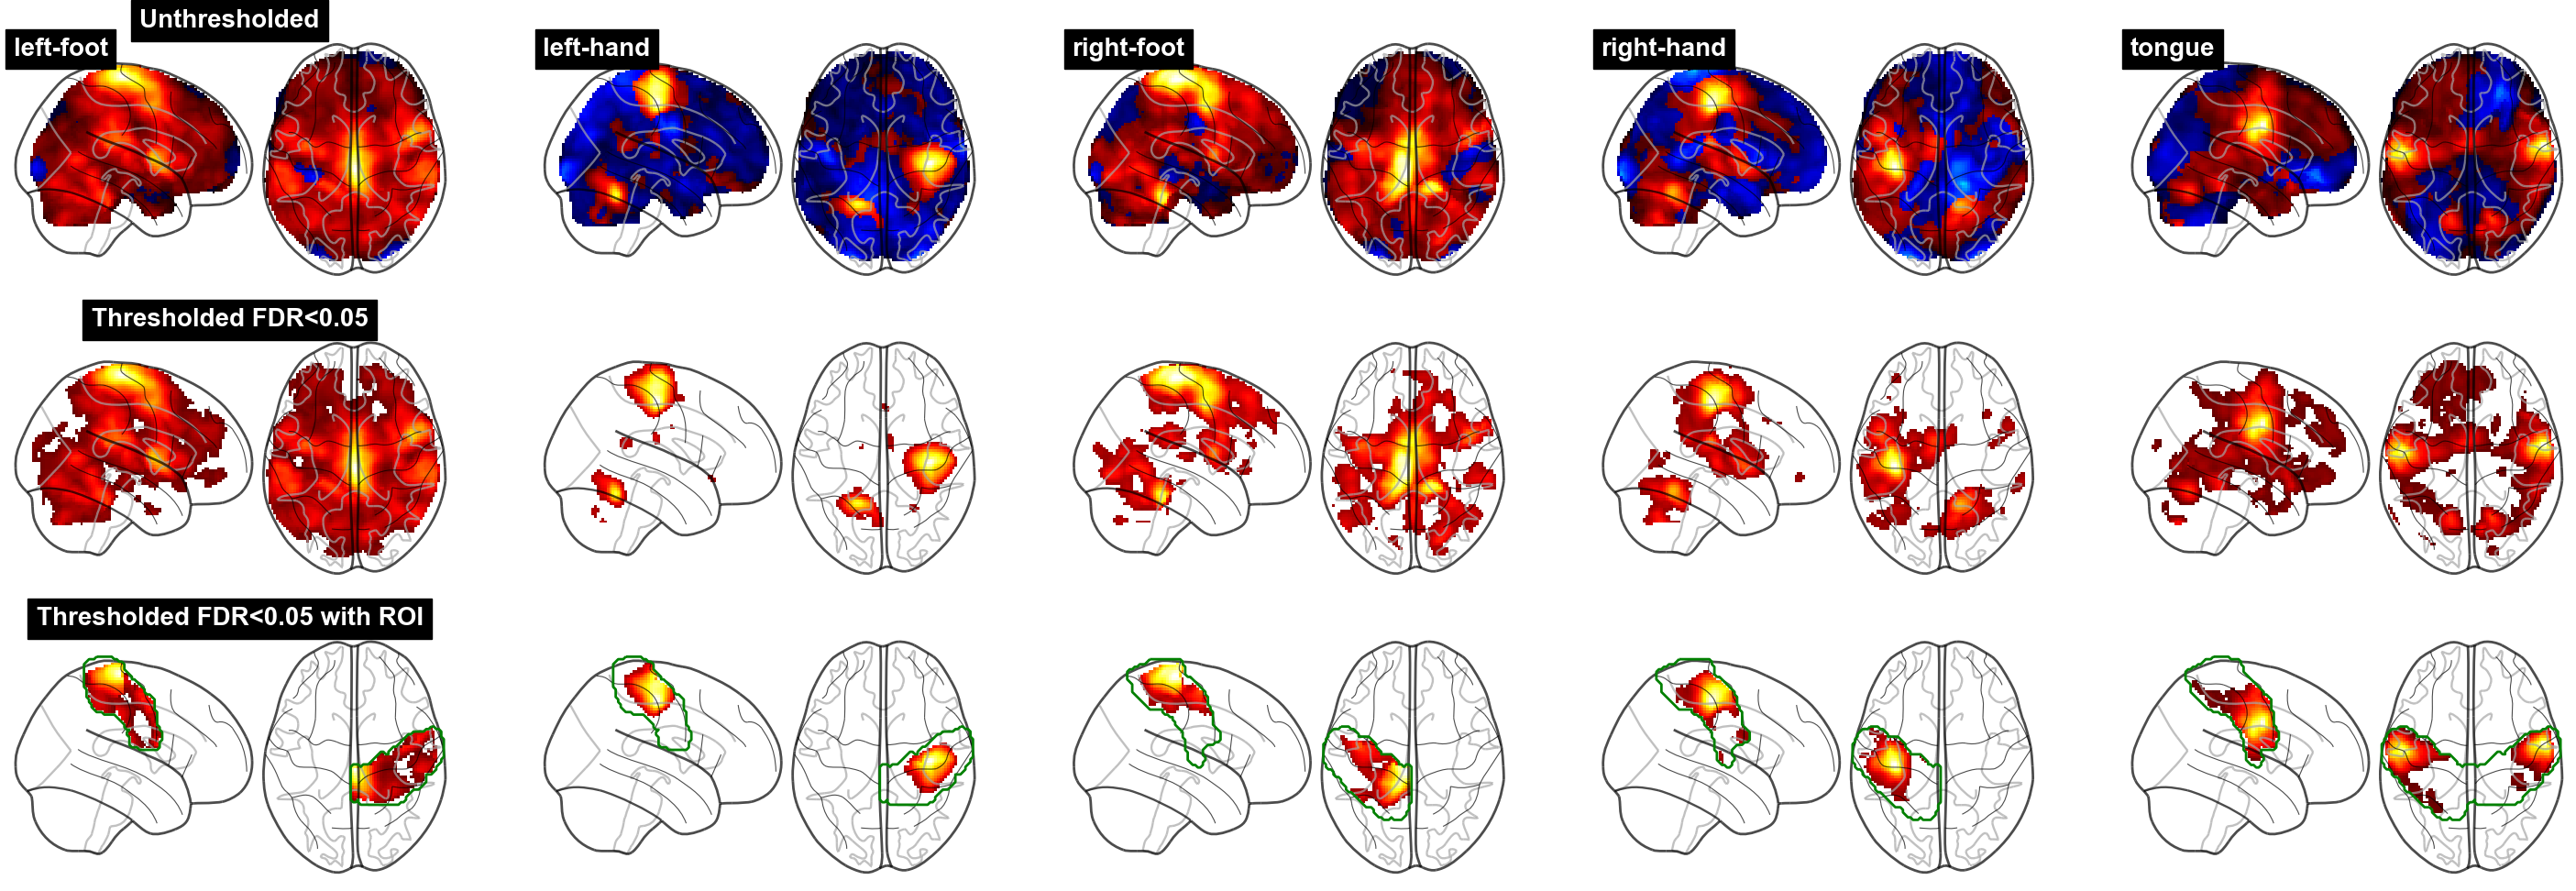

In [10]:
f,axs = plt.subplots(3,5, figsize=(36, 12)) 
contrast_dict = {'LF':'left-foot', 'LH':'left-hand', 'RF':'right-foot', 'RH':'right-hand', 'T':'tongue'}
for i,con in enumerate(['LF', 'LH', 'RF','RH','T']):
    con_txt = contrast_dict[con]
    
    if i==5:
        colbar=True
    else:
        colbar=False
        
    if con == 'LF' or con == 'LH':
        roi_mask = mask_left 
    elif con =='RF' or con == 'RH':
        roi_mask = mask_right
    else:
        roi_mask = mask

    axs[0,0].set_title('Unthresholded', backgroundcolor = 'black', color='white', fontsize=20, fontweight='bold')
    axs[1,0].set_title('Thresholded FDR<0.05', backgroundcolor = 'black', color='white', fontsize=20,fontweight='bold')
    axs[2,0].set_title('Thresholded FDR<0.05 with ROI', backgroundcolor = 'black', color='white', fontsize=20,
                       fontweight='bold')
    disp1 = plotting.plot_glass_brain(f'{data_path}/group-44_{con_txt}_spm-8-0-1_tstat.nii', 
                              figure=f, axes=axs[0,i], colorbar = colbar, display_mode='xz',
                              annotate=False, cmap=nilearn_cmaps['cold_hot'], plot_abs=False, threshold=1e-6)
    
    disp1.title(f'{con_txt}', fontweight='bold',size=20)
    
    unthresholded = nib.load(f'{data_path}/group-44_{con_txt}_spm-8-0-1_tstat.nii')
    
    resampled_unthresholded = resample_from_to(unthresholded, roi_mask)
    resampled_map_thresh, threshold = glm.threshold_stats_img(resampled_unthresholded, alpha=0.05, 
                                                              height_control='fdr', 
                                                              two_sided=False)
    
    plotting.plot_glass_brain(resampled_map_thresh, figure=f, axes=axs[1,i], colorbar = colbar, display_mode='xz',
                              annotate=False, cmap=nilearn_cmaps['cold_hot'], plot_abs=False, threshold=1e-6,
                             )
    
    roi_data = roi_mask.get_fdata() > 1e-6
    thresh_data = np.nan_to_num(resampled_map_thresh.get_fdata() * roi_data.astype('int'))
    thresh_roi = nib.Nifti1Image(thresh_data, resampled_map_thresh.affine)
    
    disp = plotting.plot_glass_brain(thresh_roi, figure=f, axes=axs[2,i], colorbar = colbar, display_mode='xz',
                              annotate=False, cmap=nilearn_cmaps['cold_hot'], plot_abs=False, threshold=1e-6,
                                    )
    
    disp.add_contours(roi_mask, contours=1, antialiased=True,
                     linewidths=2., levels=[0], colors=['green'])
    
plt.savefig(f'{figure_path}/fig1.png')

## Figure 2 - Repartition of mean Percentage of Activation for all pipelines and all contrasts

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/3721962477.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/3721962477.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/3721962477.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/3721962477.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/3721962477.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/3721962477.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

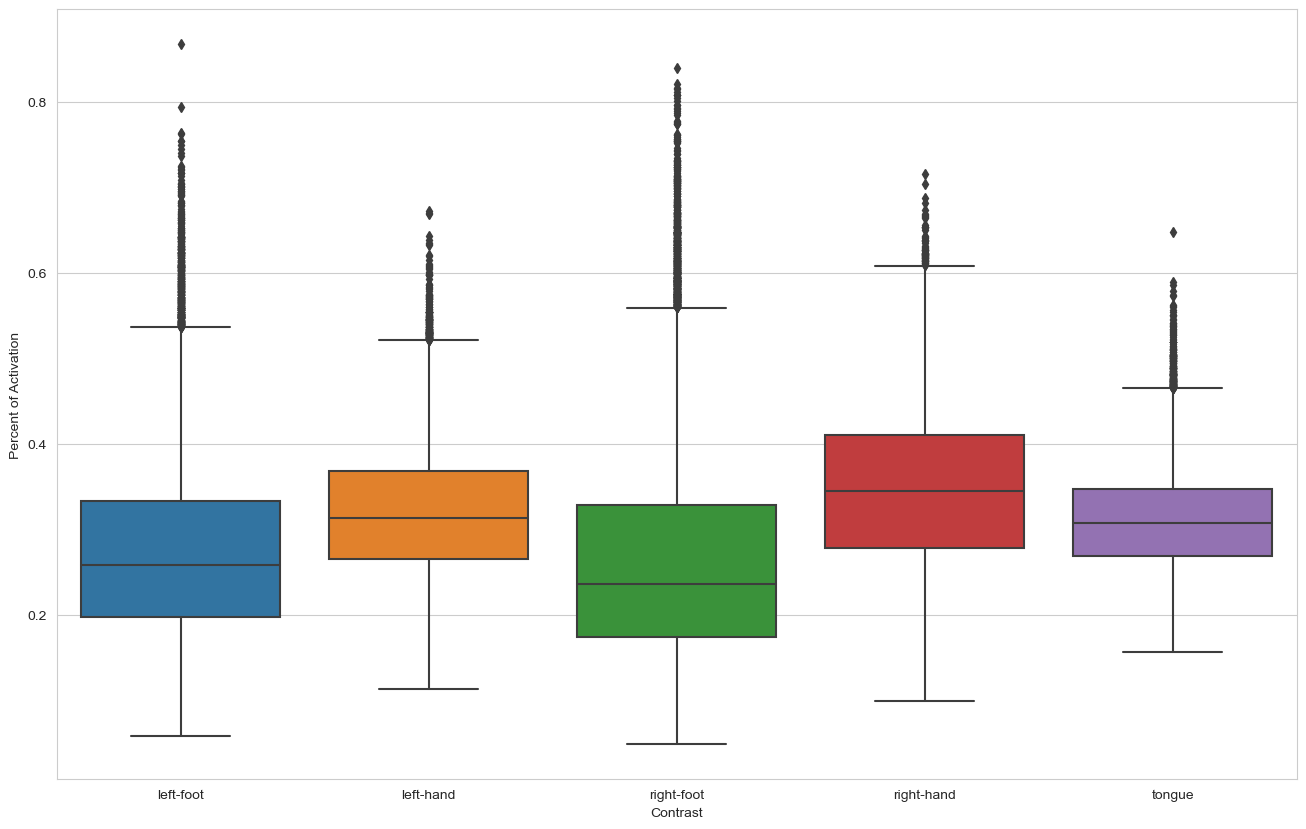

In [25]:
contrast_dict = {'lf':'left-foot', 'lh':'left-hand', 'rf':'right-foot', 'rh':'right-hand', 't':'tongue'}
df_global = pd.DataFrame()
for soft in ['FSL','SPM']:
    for f in [5,8]:
        for p in [0,6,24]:
            for h in [0,1]:
                df = pd.read_csv(f'{figure_path}/validation_{soft}_{f}_{p}_{h}_anat_roi.csv')
                df_fig=df
                df_fig.columns = ['ID','Name','Contrast','PO','Percent of Activation']
                df_fig = df[df['Contrast']!='cue']
                for con in ['lf','lh','rf','rh','t']:
                    df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
                df_global = pd.concat([df_global, df_fig])
                    
fig = plt.figure(figsize=(16,10))

sns.set_style("whitegrid")
sns.boxplot(data=df_global, x="Contrast", y="Percent of Activation")
plt.savefig(f'{figure_path}/fig2.png')                  
                    

## Figure 3 - Thresholded masked statistic maps for contrasts right foot (right) and right hand (left) for group-level analysis of group nº3 with pipeline SPM,5,0,0

Percentage of Activation were respectively 0.34 and 0.41 for the contrasts right foot and right hand.

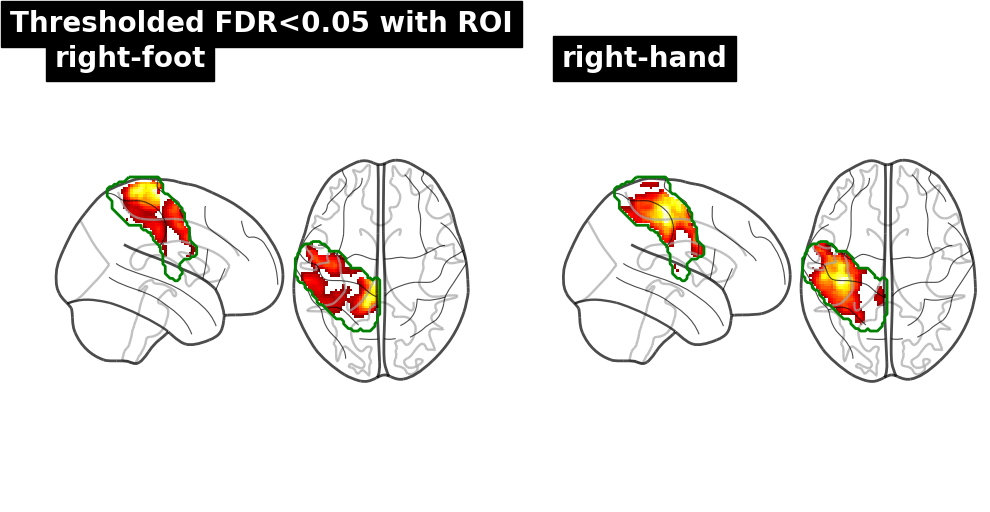

In [14]:
f,axs = plt.subplots(1,2, figsize=(12, 6)) 
contrast_dict = {'RF':'right-foot', 'RH':'right-hand'}
for i,con in enumerate(['RF','RH']):
    con_txt = contrast_dict[con]
    
    if i==5:
        colbar=True
    else:
        colbar=False
        
    if con == 'LF' or con == 'LH':
        roi_mask = mask_left 
    elif con =='RF' or con == 'RH':
        roi_mask = mask_right
    else:
        roi_mask = mask

    axs[0].set_title('Thresholded FDR<0.05 with ROI', backgroundcolor = 'black', color='white', fontsize=20,
                       fontweight='bold')
        
    unthresholded = nib.load(f'{data_path}/group-3_{con_txt}_spm-5-0-0_tstat.nii')
    
    resampled_unthresholded = resample_from_to(unthresholded, roi_mask)
    resampled_map_thresh, threshold = glm.threshold_stats_img(resampled_unthresholded, alpha=0.05, 
                                                              height_control='fdr', 
                                                              two_sided=False)
    
    roi_data = roi_mask.get_fdata() > 1e-6
    thresh_data = np.nan_to_num(resampled_map_thresh.get_fdata() * roi_data.astype('int'))
    thresh_roi = nib.Nifti1Image(thresh_data, resampled_map_thresh.affine)
    
    disp = plotting.plot_glass_brain(thresh_roi, figure=f, axes=axs[i], colorbar = colbar, display_mode='xz',
                              annotate=False, cmap=nilearn_cmaps['cold_hot'], plot_abs=False, threshold=1e-6)
    disp.title(f'{con_txt}', fontweight='bold',size=20)
    
    disp.add_contours(roi_mask, contours=1, antialiased=True,
                     linewidths=2., levels=[0], colors=['green'])
    
plt.savefig(f'{figure_path}/fig3.png')

In [17]:
soft='SPM'
f=5
p=0
h=0
df = pd.read_csv(f'../figures/validation_{soft}_{f}_{p}_{h}_anat_roi.csv')
df[df['name'].str.contains('n_3_')]

,Unnamed: 0,name,contrast,percent_overlap,percent_activated
1998,1998,n_3_contrast_cue,cue,NaN,0.747612
1999,1999,n_3_contrast_lf,lf,NaN,0.446731
2000,2000,n_3_contrast_lh,lh,NaN,0.365040
2001,2001,n_3_contrast_rf,rf,NaN,0.340679
2002,2002,n_3_contrast_rh,rh,NaN,0.411739
2003,2003,n_3_contrast_t,t,NaN,0.398993


## Figure 4 - Repartition of Percentage of Activation for all group-level statistic maps and all contrasts for each pipeline.

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.756390
lf            2998.0              NaN           0.355437
lh            2999.0              NaN           0.345985
rf            3000.0              NaN           0.373424
rh            3001.0              NaN           0.391366
t             3002.0              NaN           0.346691
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.275693
2        2  n_1000_contrast_lh         lh NaN               0.337684
3        3  n_1000_contrast_rf         rf NaN               0.185121
4        4  n_1000_contrast_rh         rh NaN               0.317781
5        5   n_1000_contrast_t          t NaN               0.296914
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.704783
lf            2998.0              NaN           0.275891
lh            2999.0              NaN           0.338635
rf            3000.0              NaN           0.250578
rh            3001.0              NaN           0.384604
t             3002.0              NaN           0.313471
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.235789
2        2  n_1000_contrast_lh         lh NaN               0.289497
3        3  n_1000_contrast_rf         rf NaN               0.121479
4        4  n_1000_contrast_rh         rh NaN               0.303053
5        5   n_1000_contrast_t          t NaN               0.260610
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.715341
lf            2998.0              NaN           0.264756
lh            2999.0              NaN           0.338317
rf            3000.0              NaN           0.222457
rh            3001.0              NaN           0.384407
t             3002.0              NaN           0.323294
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.251851
2        2  n_1000_contrast_lh         lh NaN               0.305308
3        3  n_1000_contrast_rf         rf NaN               0.127714
4        4  n_1000_contrast_rh         rh NaN               0.310256
5        5   n_1000_contrast_t          t NaN               0.290082
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.842782
lf            2998.0              NaN           0.440471
lh            2999.0              NaN           0.413005
rf            3000.0              NaN           0.475561
rh            3001.0              NaN           0.453893
t             3002.0              NaN           0.403774
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.331284
2        2  n_1000_contrast_lh         lh NaN               0.395533
3        3  n_1000_contrast_rf         rf NaN               0.225865
4        4  n_1000_contrast_rh         rh NaN               0.372071
5        5   n_1000_contrast_t          t NaN               0.337502
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.800161
lf            2998.0              NaN           0.343042
lh            2999.0              NaN           0.412536
rf            3000.0              NaN           0.323892
rh            3001.0              NaN           0.454409
t             3002.0              NaN           0.365287
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.282344
2        2  n_1000_contrast_lh         lh NaN               0.339817
3        3  n_1000_contrast_rf         rf NaN               0.144485
4        4  n_1000_contrast_rh         rh NaN               0.359063
5        5   n_1000_contrast_t          t NaN               0.294540
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.814247
lf            2998.0              NaN           0.330552
lh            2999.0              NaN           0.414807
rf            3000.0              NaN           0.282627
rh            3001.0              NaN           0.459971
t             3002.0              NaN           0.380251
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.301418
2        2  n_1000_contrast_lh         lh NaN               0.369683
3        3  n_1000_contrast_rf         rf NaN               0.146420
4        4  n_1000_contrast_rh         rh NaN               0.373468
5        5   n_1000_contrast_t          t NaN               0.333970
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.675464
lf            2998.0              NaN           0.334950
lh            2999.0              NaN           0.298995
rf            3000.0              NaN           0.344853
rh            3001.0              NaN           0.348615
t             3002.0              NaN           0.309831
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.274438
2        2  n_1000_contrast_lh         lh NaN               0.292257
3        3  n_1000_contrast_rf         rf NaN               0.199419
4        4  n_1000_contrast_rh         rh NaN               0.313051
5        5   n_1000_contrast_t          t NaN               0.279138
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.653849
lf            2998.0              NaN           0.229358
lh            2999.0              NaN           0.271725
rf            3000.0              NaN           0.186091
rh            3001.0              NaN           0.344700
t             3002.0              NaN           0.272418
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.209060
2        2  n_1000_contrast_lh         lh NaN               0.226001
3        3  n_1000_contrast_rf         rf NaN               0.126532
4        4  n_1000_contrast_rh         rh NaN               0.285960
5        5   n_1000_contrast_t          t NaN               0.237855
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.668438
lf            2998.0              NaN           0.209442
lh            2999.0              NaN           0.273270
rf            3000.0              NaN           0.171532
rh            3001.0              NaN           0.339885
t             3002.0              NaN           0.282900
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.185343
2        2  n_1000_contrast_lh         lh NaN               0.222738
3        3  n_1000_contrast_rf         rf NaN               0.111911
4        4  n_1000_contrast_rh         rh NaN               0.270909
5        5   n_1000_contrast_t          t NaN               0.244630
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.765850
lf            2998.0              NaN           0.429163
lh            2999.0              NaN           0.365457
rf            3000.0              NaN           0.440492
rh            3001.0              NaN           0.425057
t             3002.0              NaN           0.373130
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.359518
2        2  n_1000_contrast_lh         lh NaN               0.357008
3        3  n_1000_contrast_rf         rf NaN               0.233821
4        4  n_1000_contrast_rh         rh NaN               0.377016
5        5   n_1000_contrast_t          t NaN               0.328006
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.754873
lf            2998.0              NaN           0.302017
lh            2999.0              NaN           0.336692
rf            3000.0              NaN           0.240610
rh            3001.0              NaN           0.426930
t             3002.0              NaN           0.333087
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.271929
2        2  n_1000_contrast_lh         lh NaN               0.272682
3        3  n_1000_contrast_rf         rf NaN               0.150075
4        4  n_1000_contrast_rh         rh NaN               0.346700
5        5   n_1000_contrast_t          t NaN               0.286897
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['contrast']).mean())
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_96221/2787725325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

          Unnamed: 0  percent_overlap  percent_activated
contrast                                                
cue           2997.0              NaN           0.768154
lf            2998.0              NaN           0.275339
lh            2999.0              NaN           0.341634
rf            3000.0              NaN           0.220334
rh            3001.0              NaN           0.428587
t             3002.0              NaN           0.349912
        ID                Name   Contrast  PO  Percent of Activation
1        1  n_1000_contrast_lf  left-foot NaN               0.231146
2        2  n_1000_contrast_lh         lh NaN               0.270423
3        3  n_1000_contrast_rf         rf NaN               0.128467
4        4  n_1000_contrast_rh         rh NaN               0.327241
5        5   n_1000_contrast_t          t NaN               0.297609
...    ...                 ...        ...  ..                    ...
5995  5995     n_9_contrast_lf  left-foot NaN               0

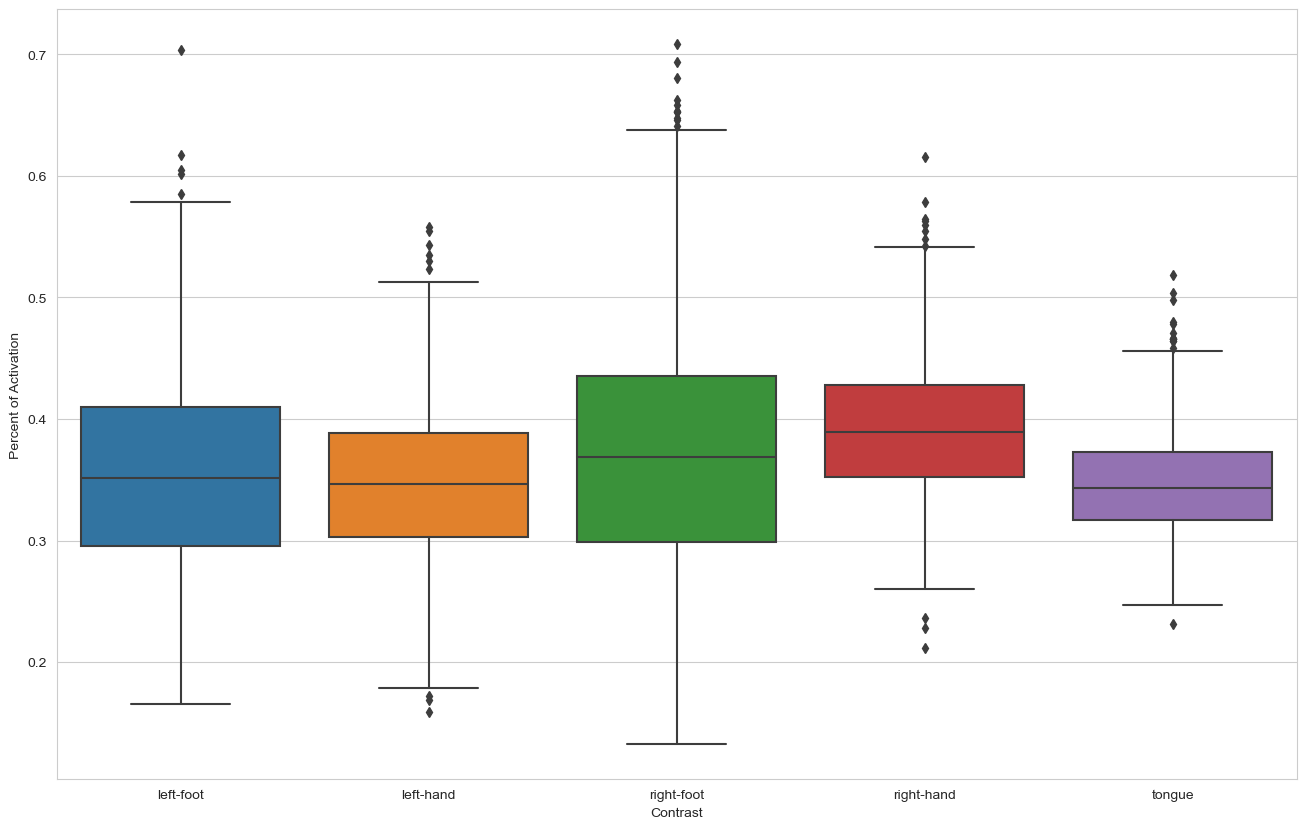

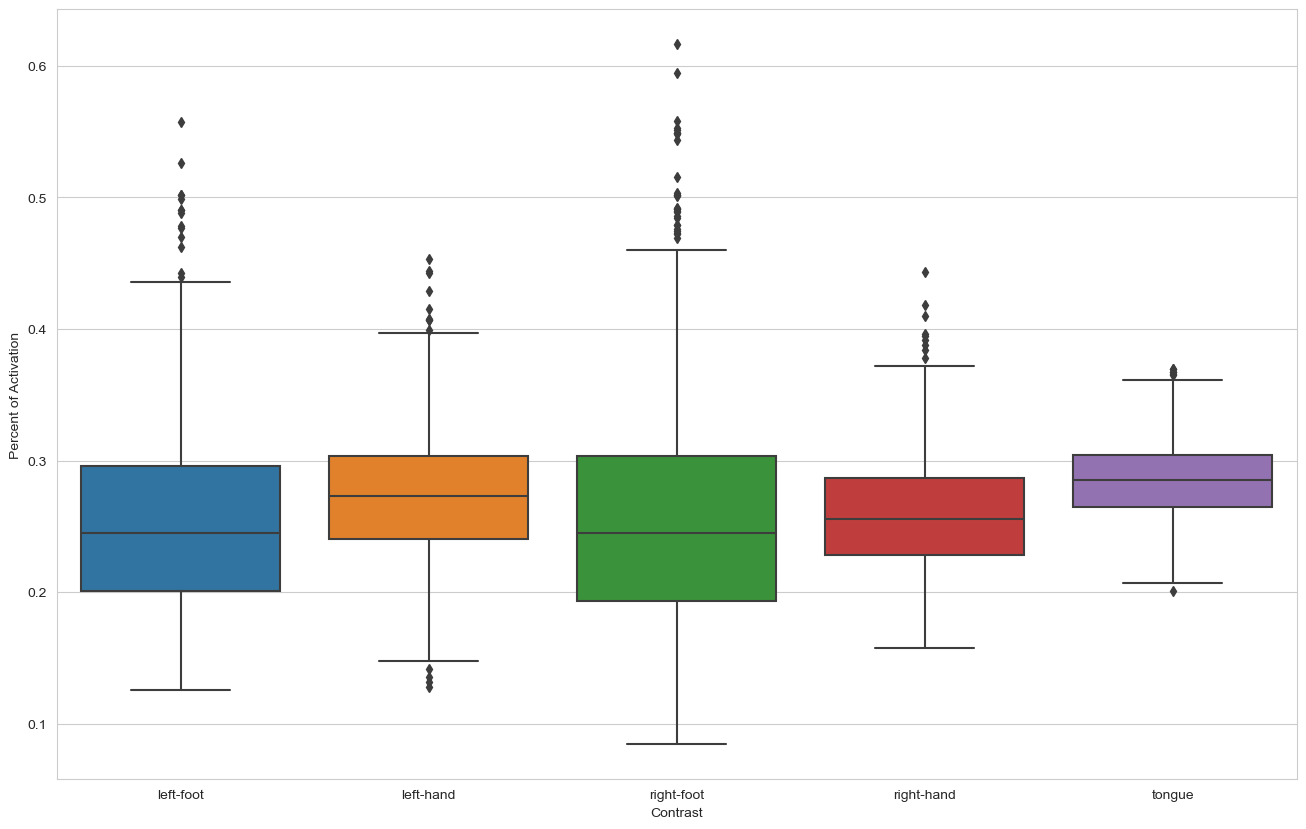

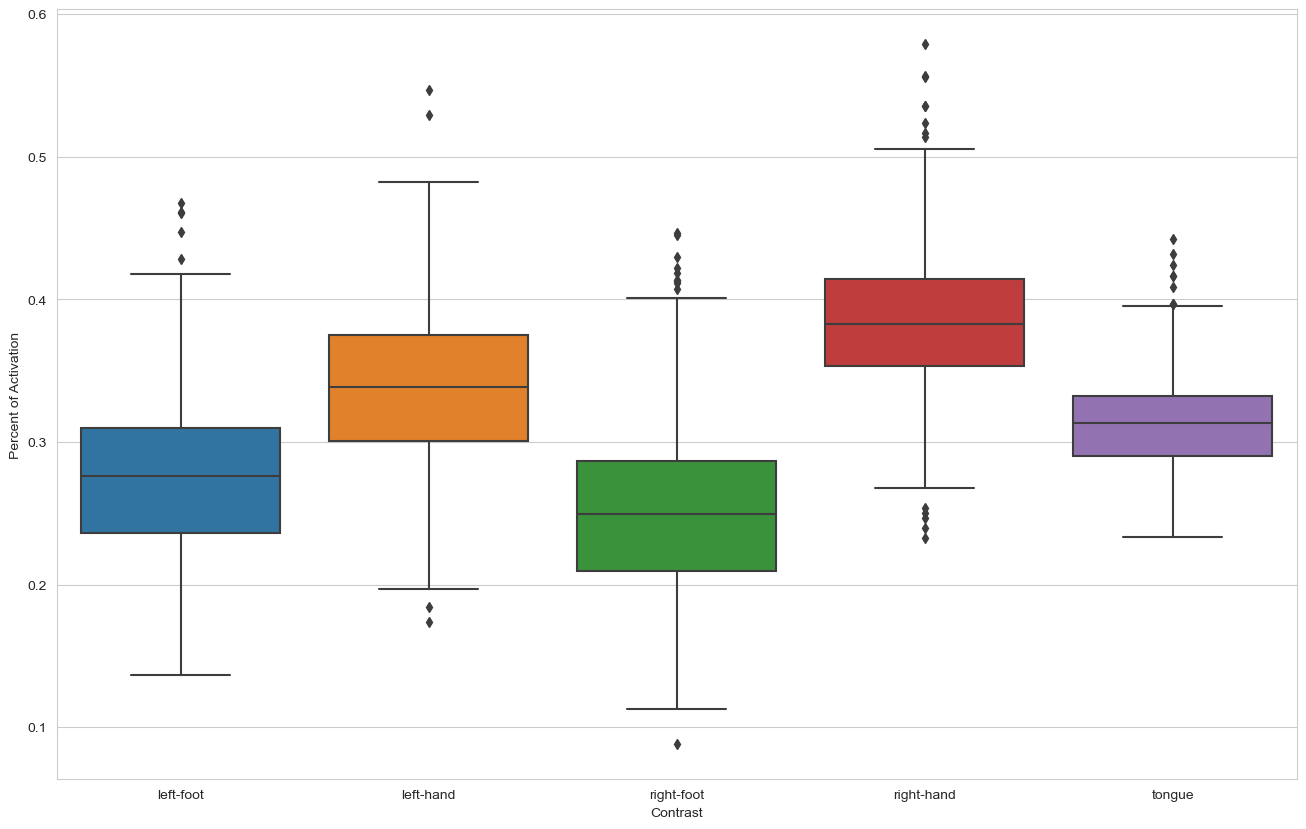

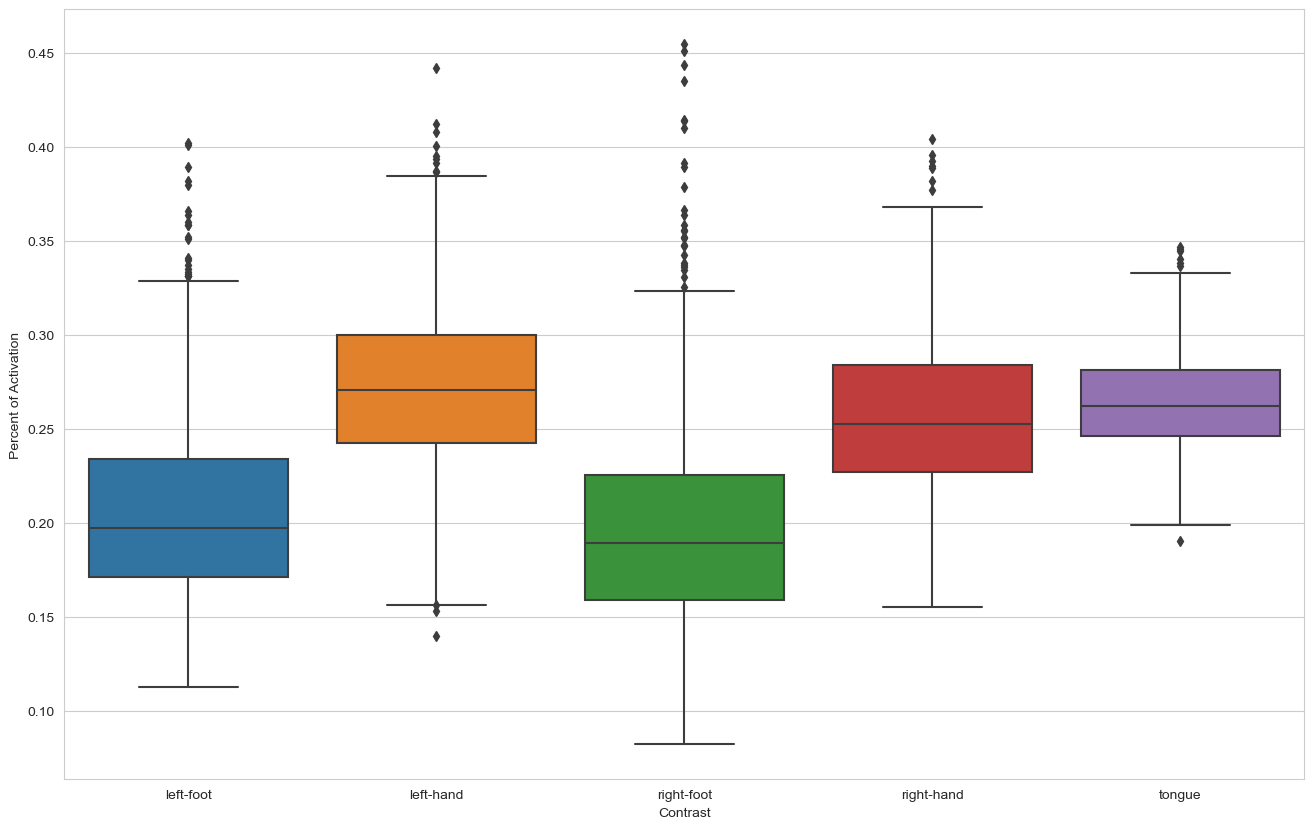

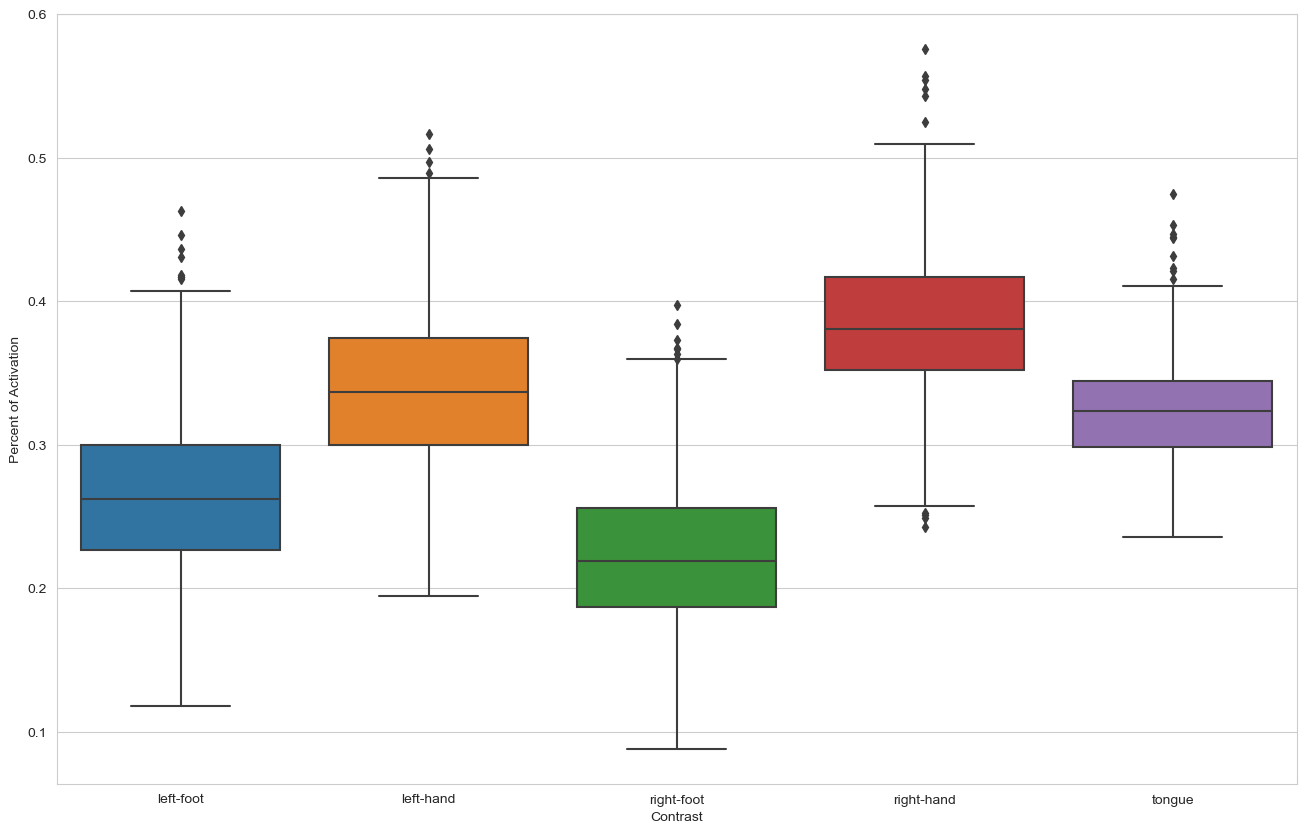

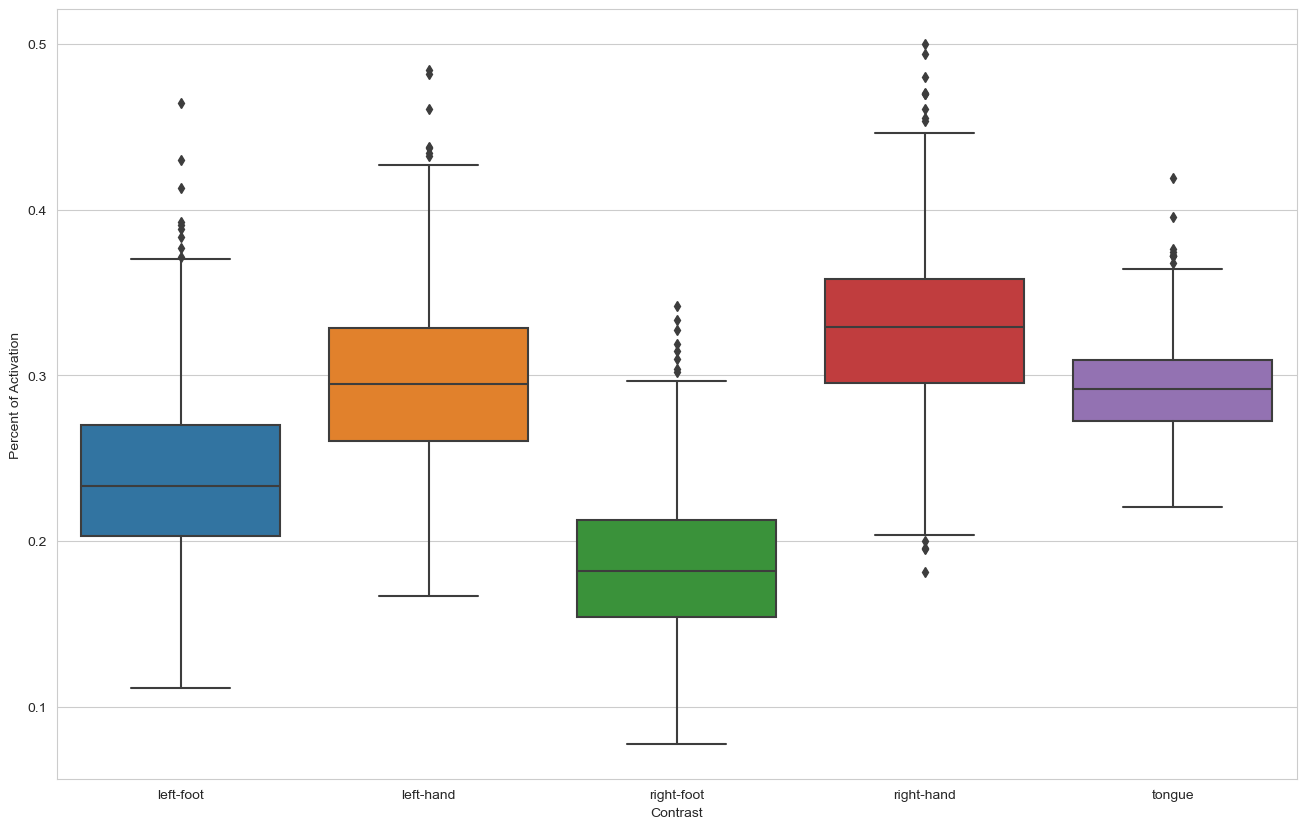

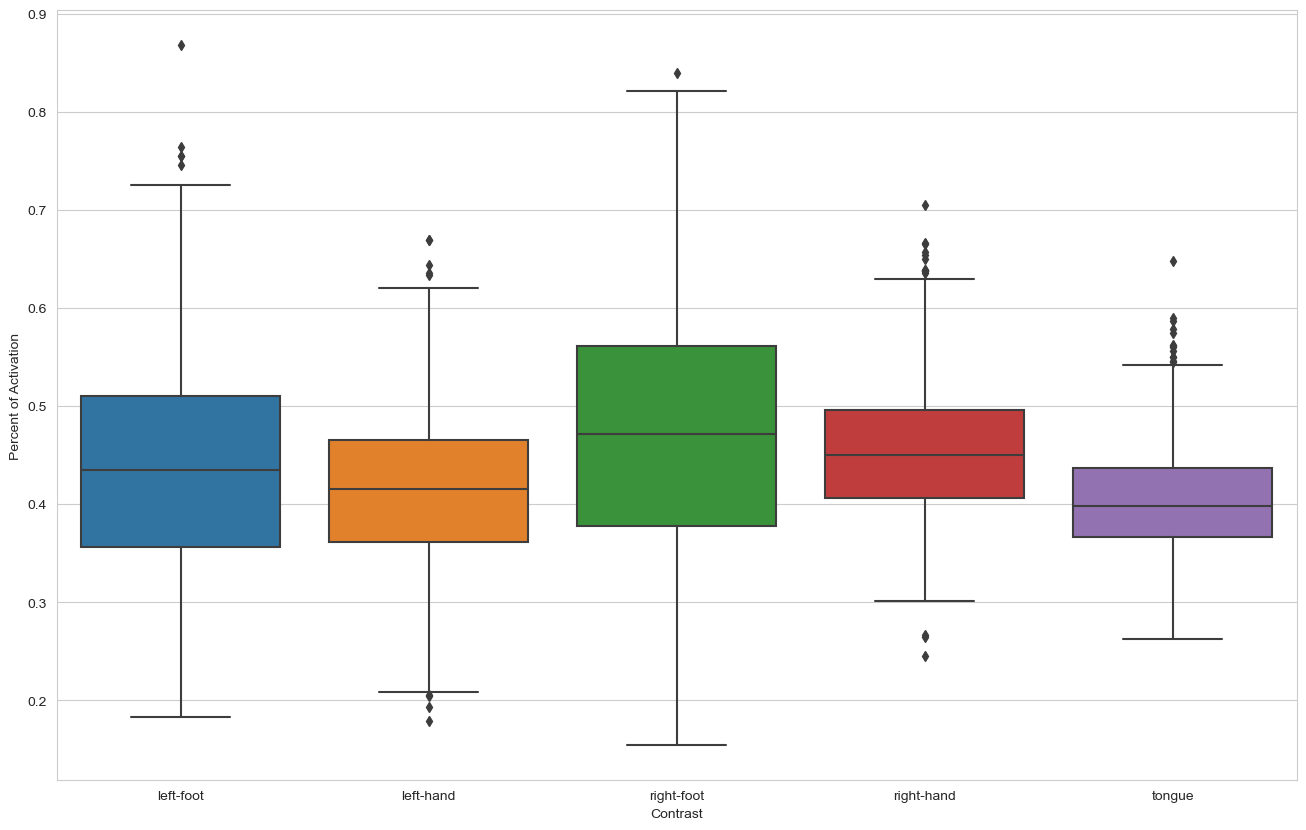

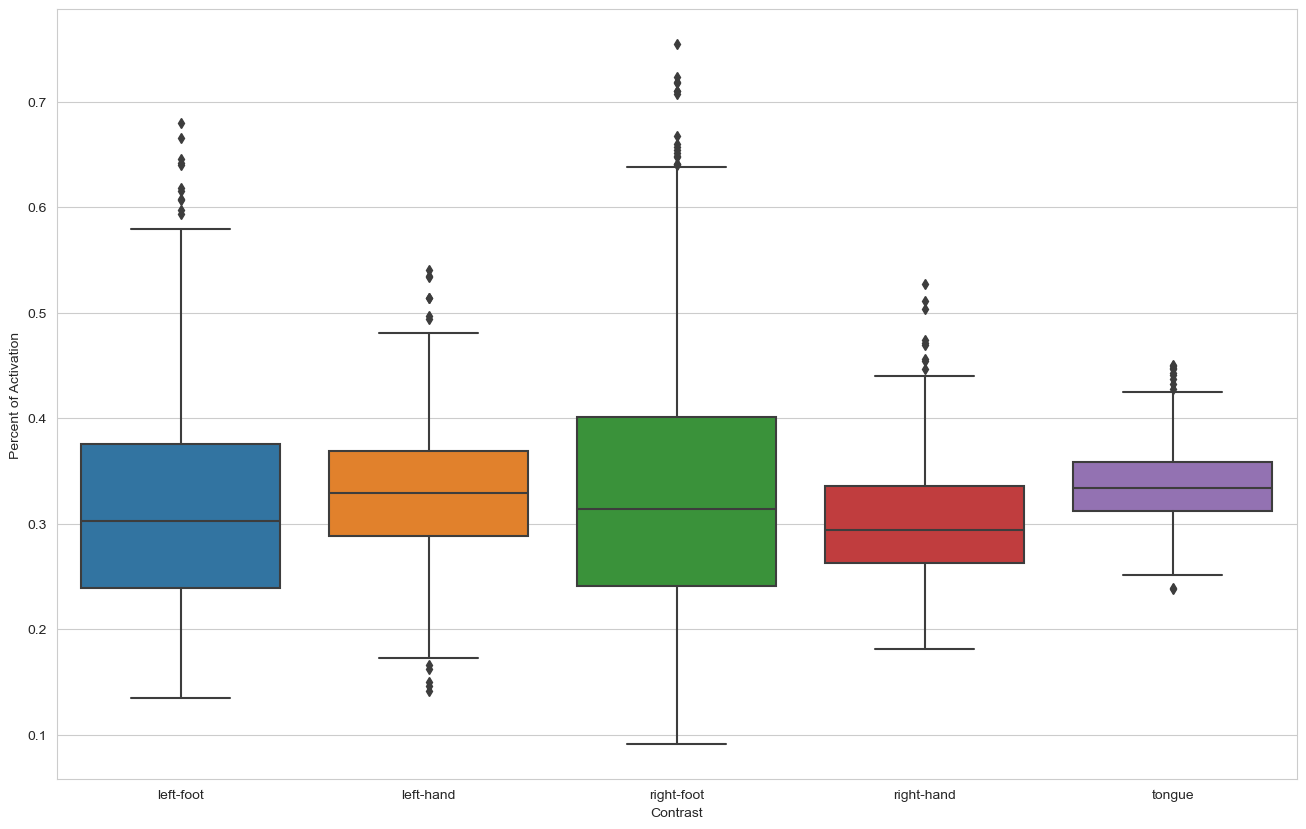

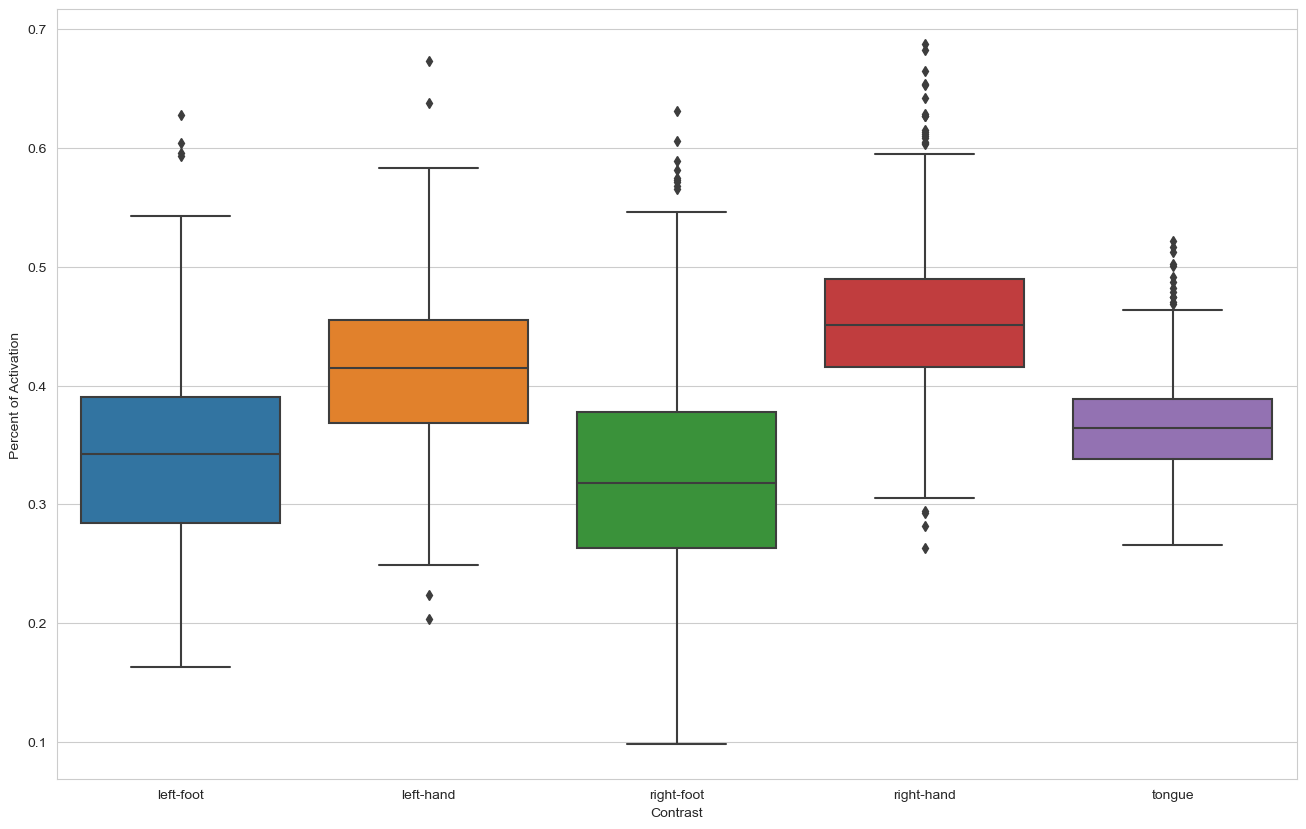

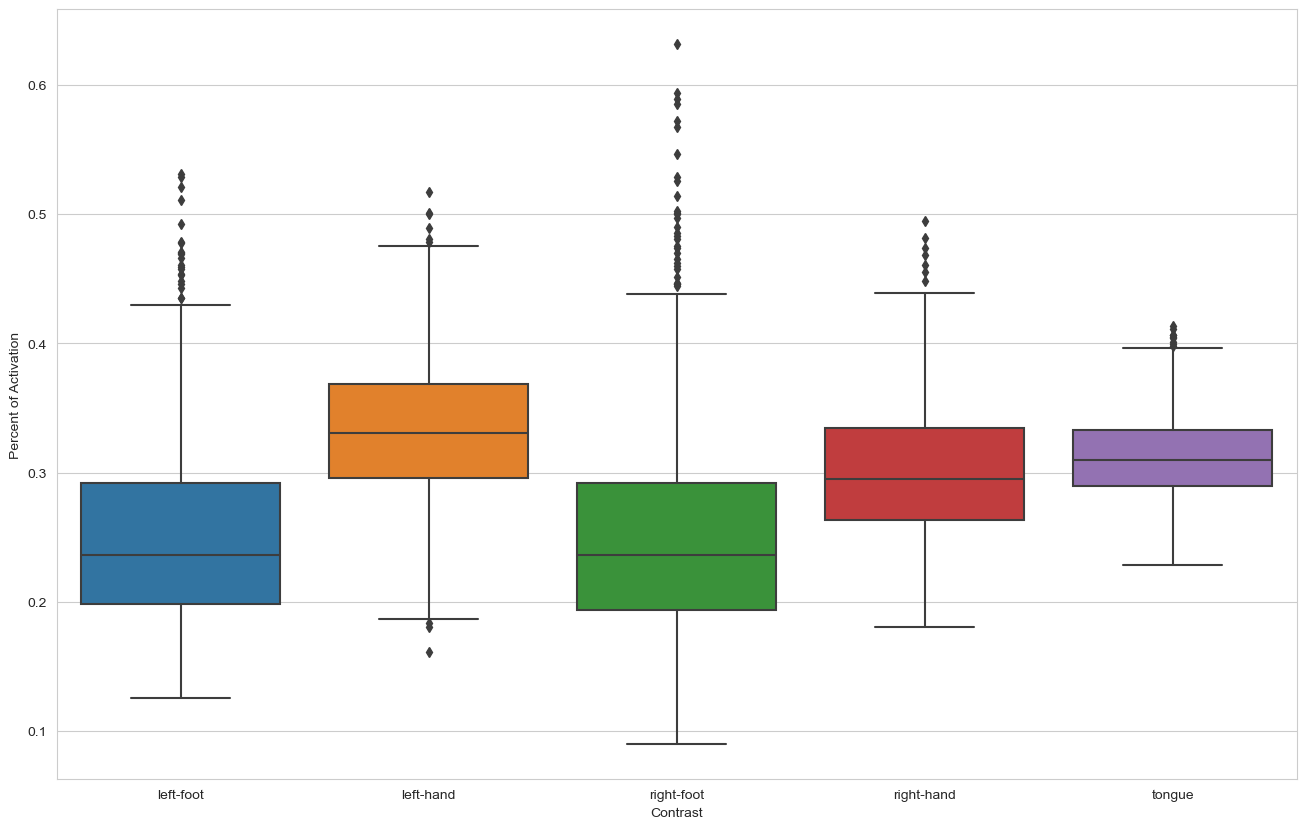

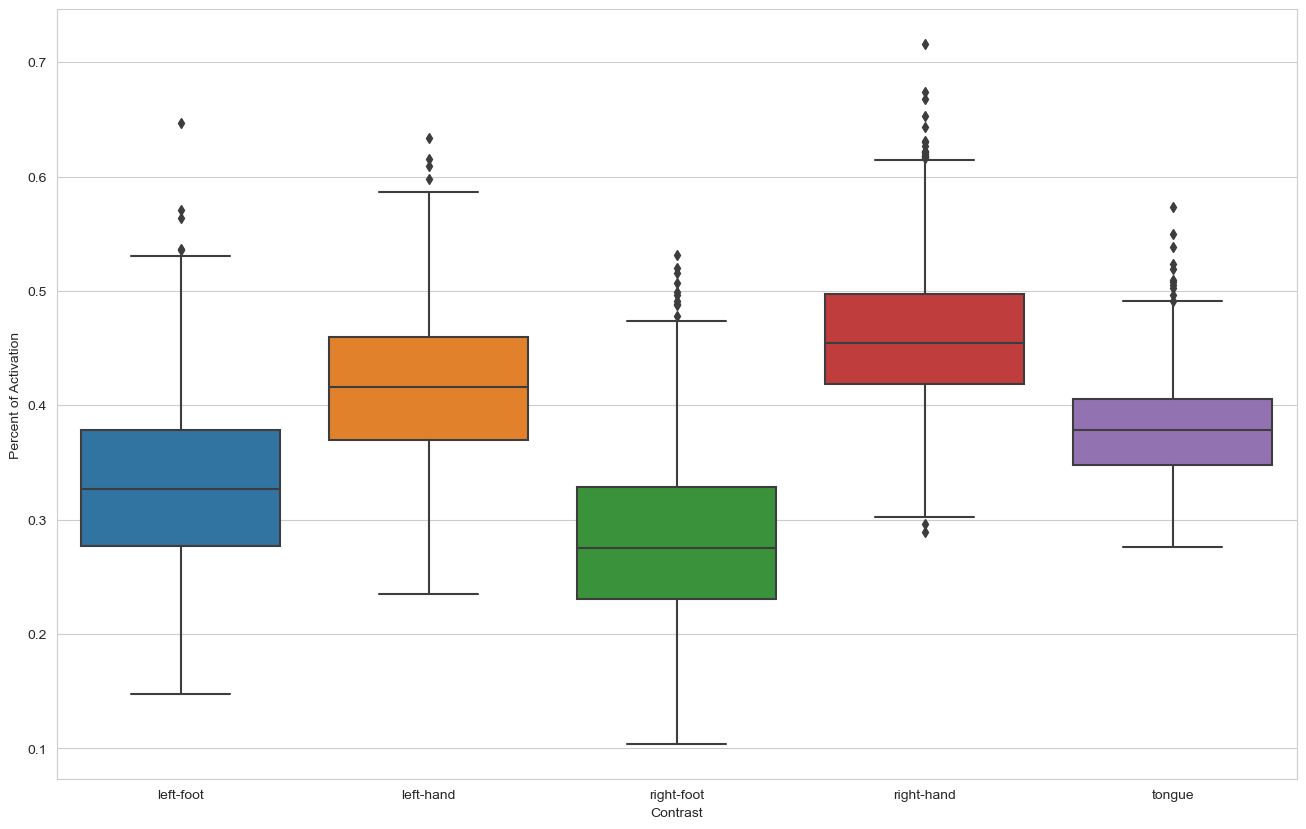

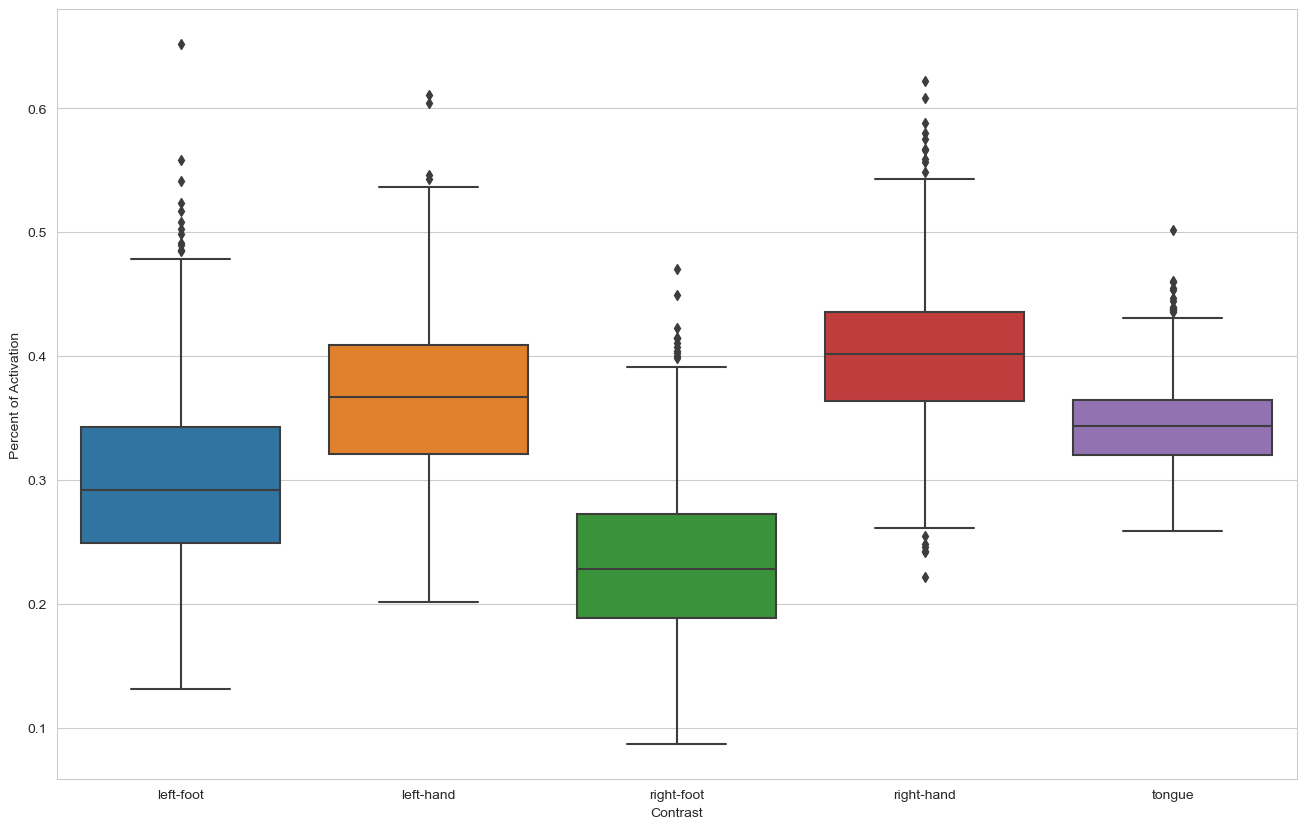

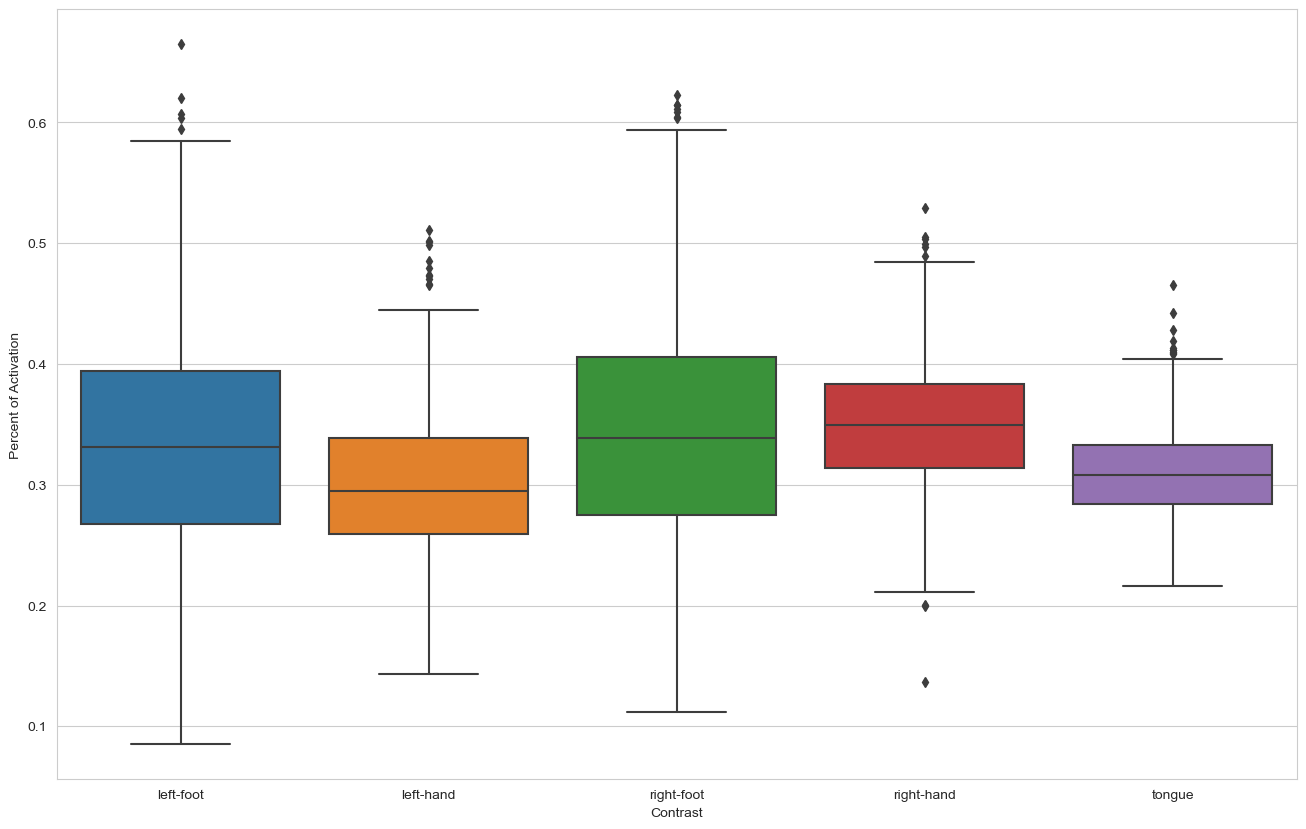

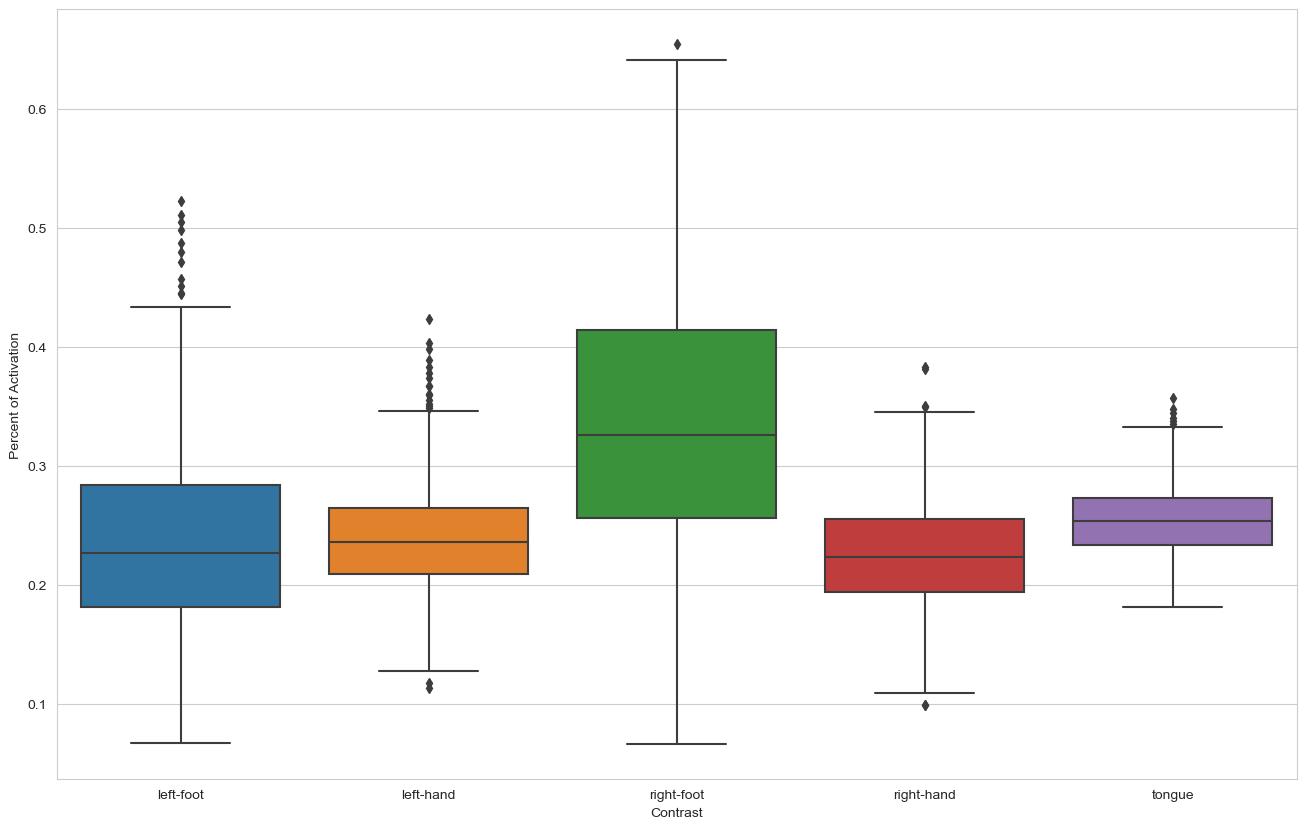

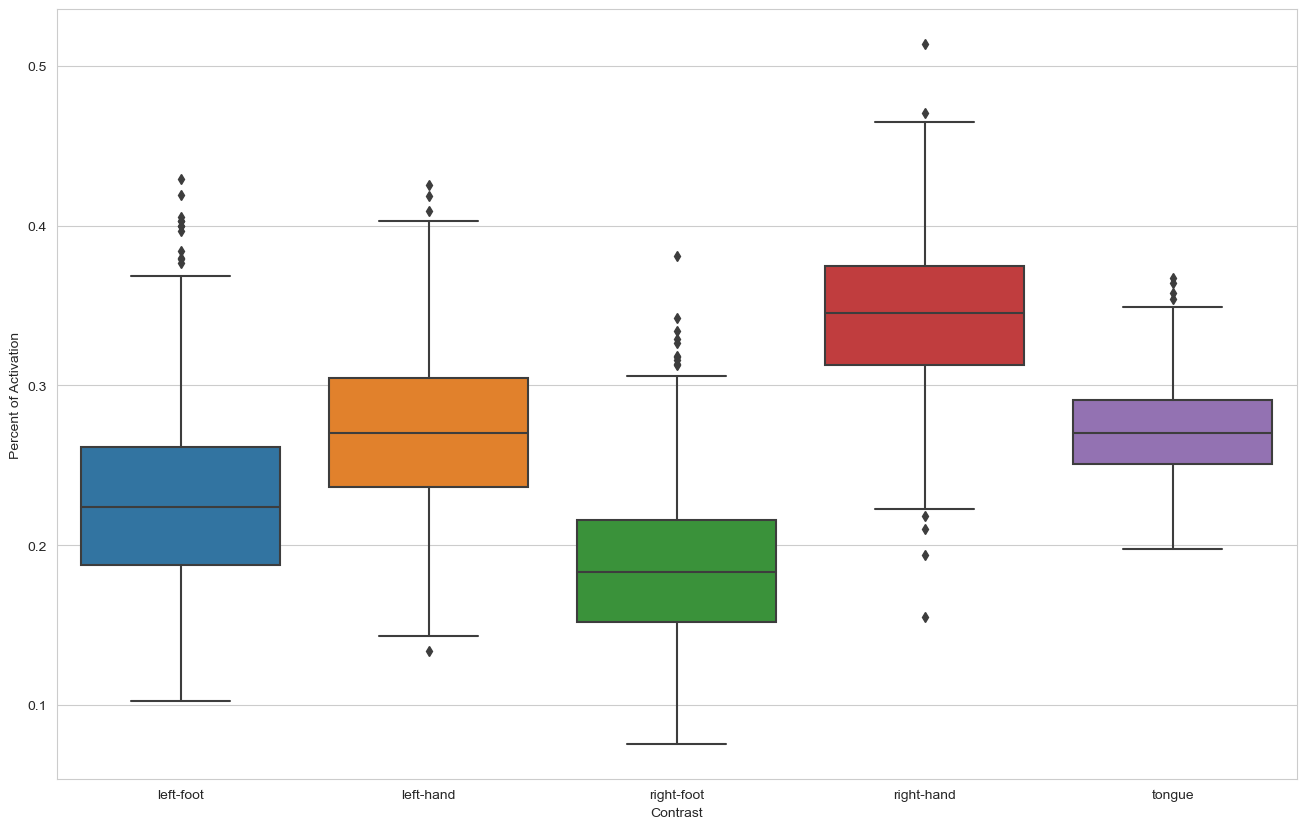

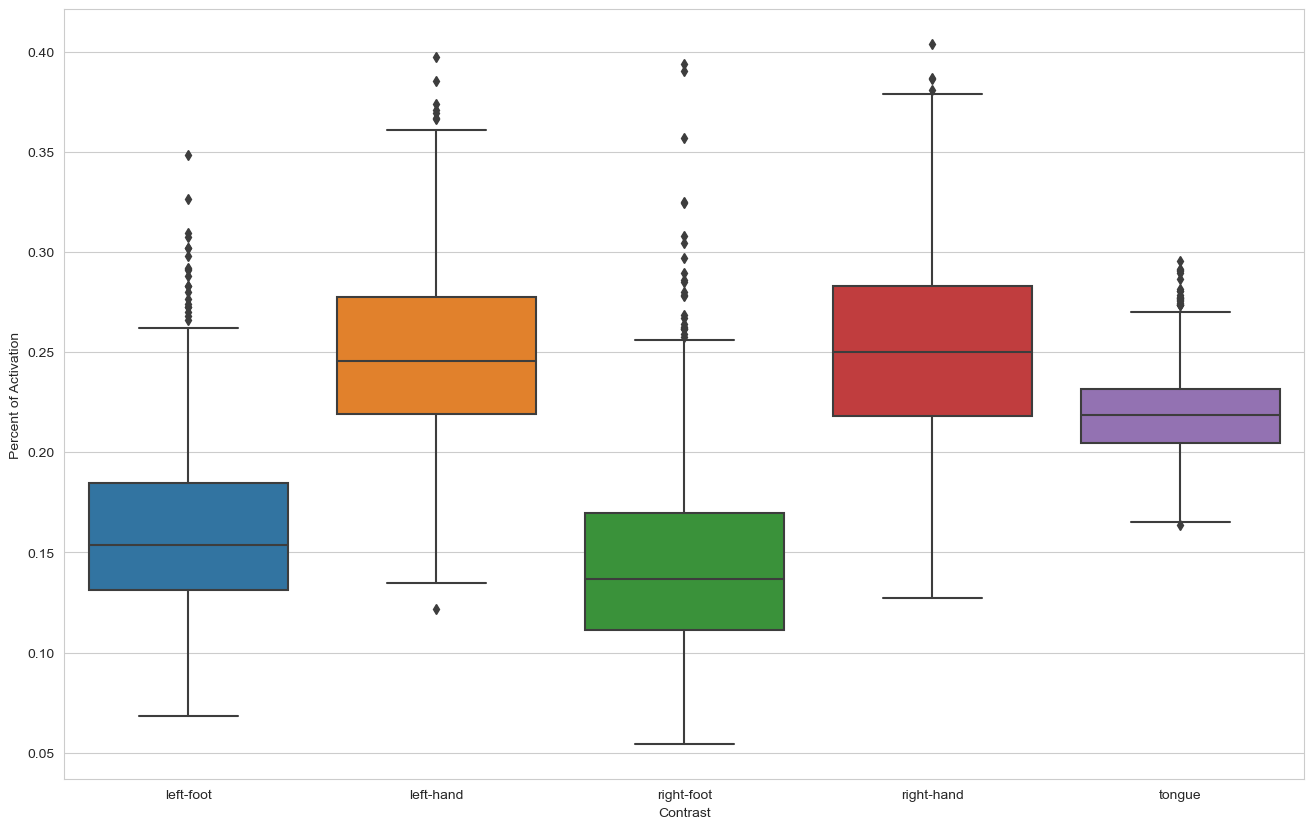

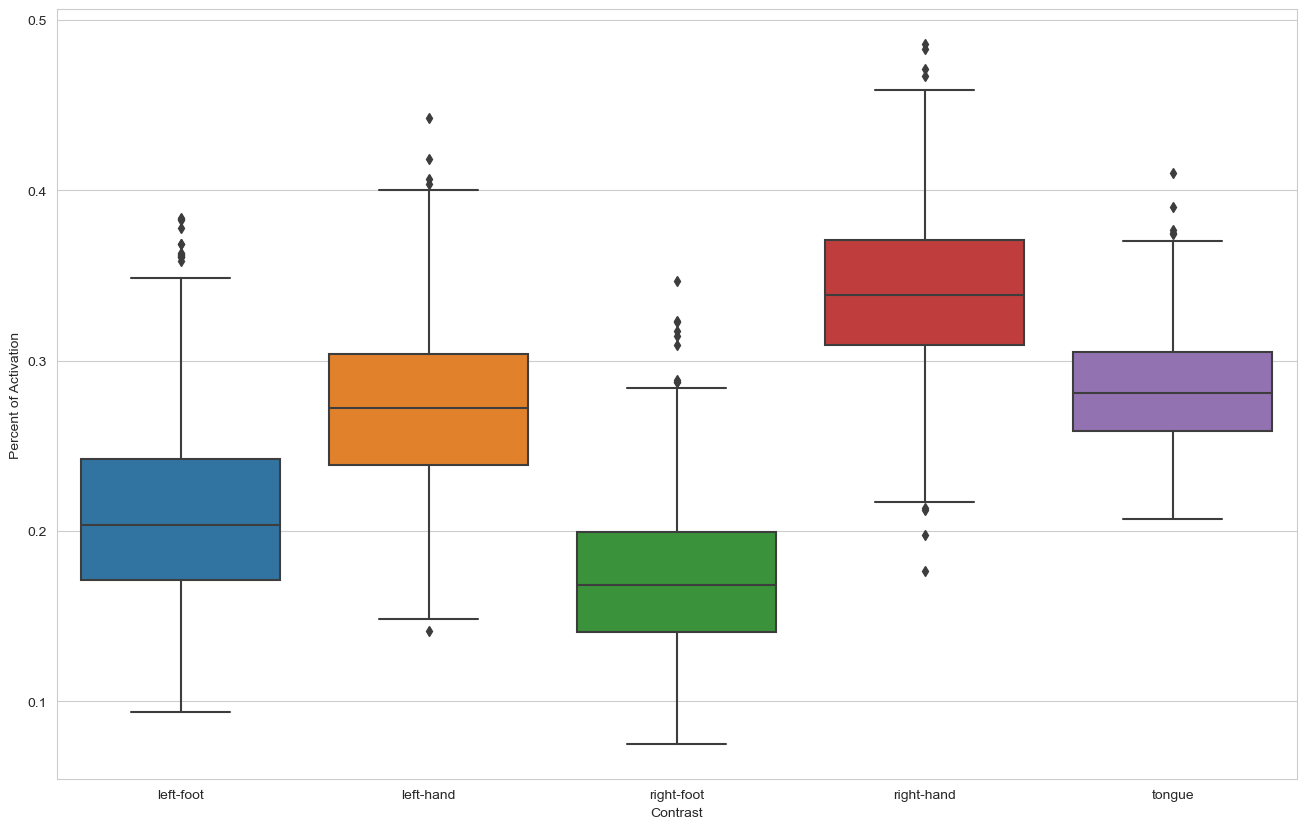

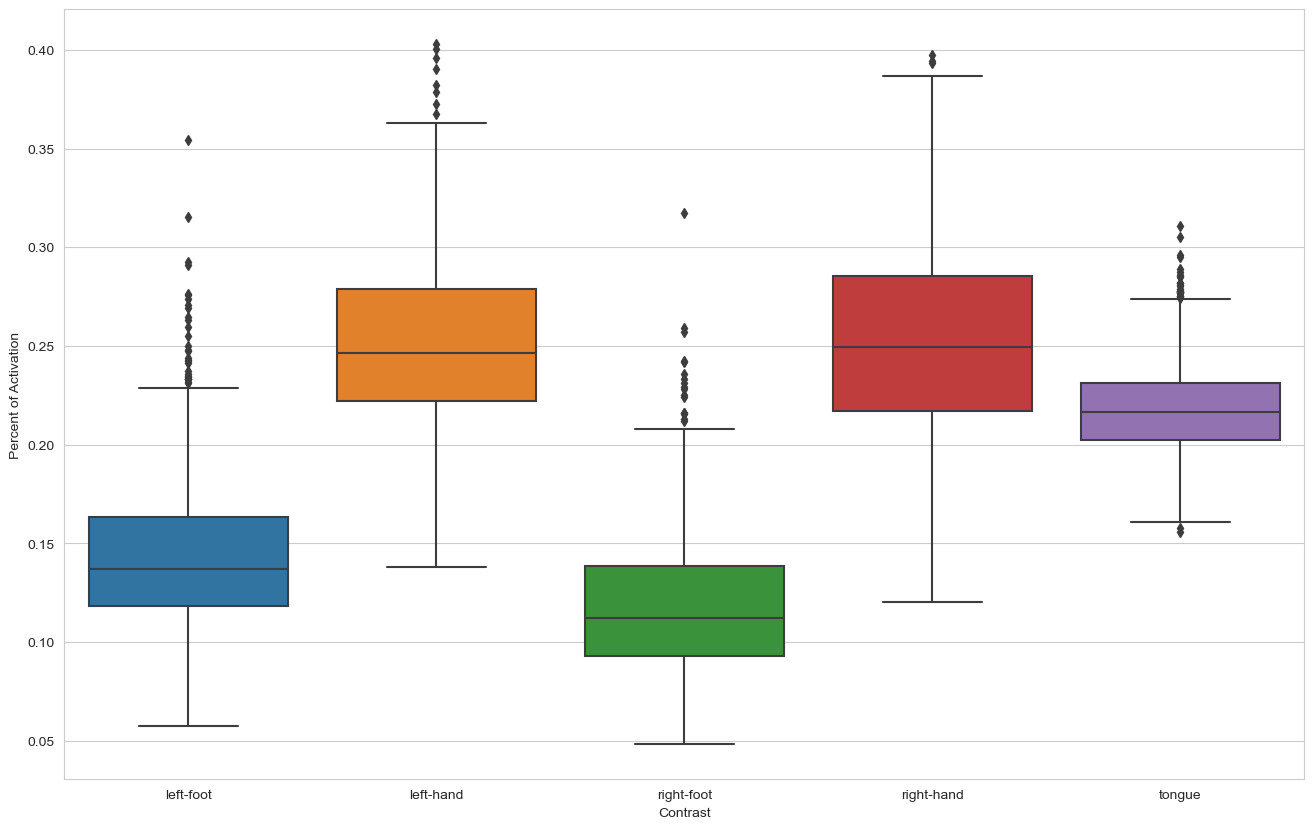

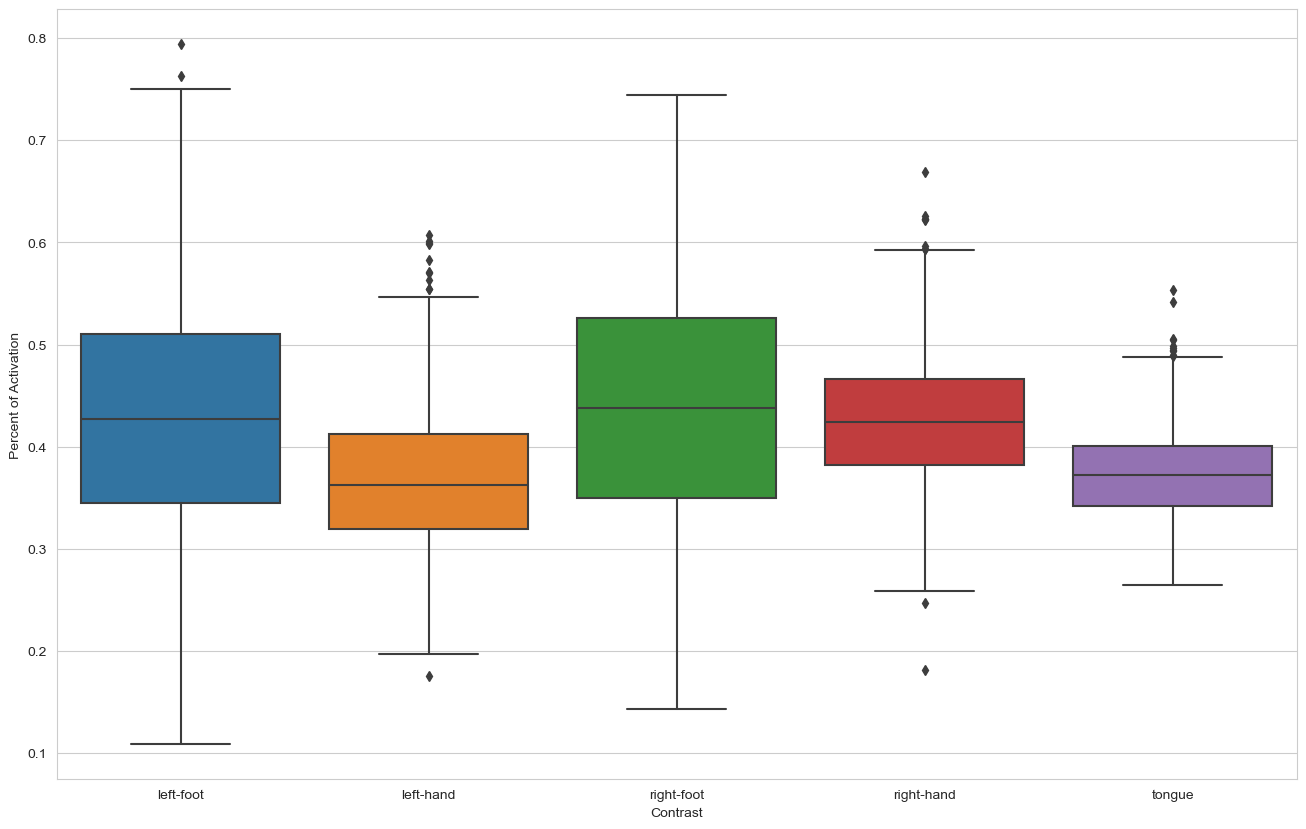

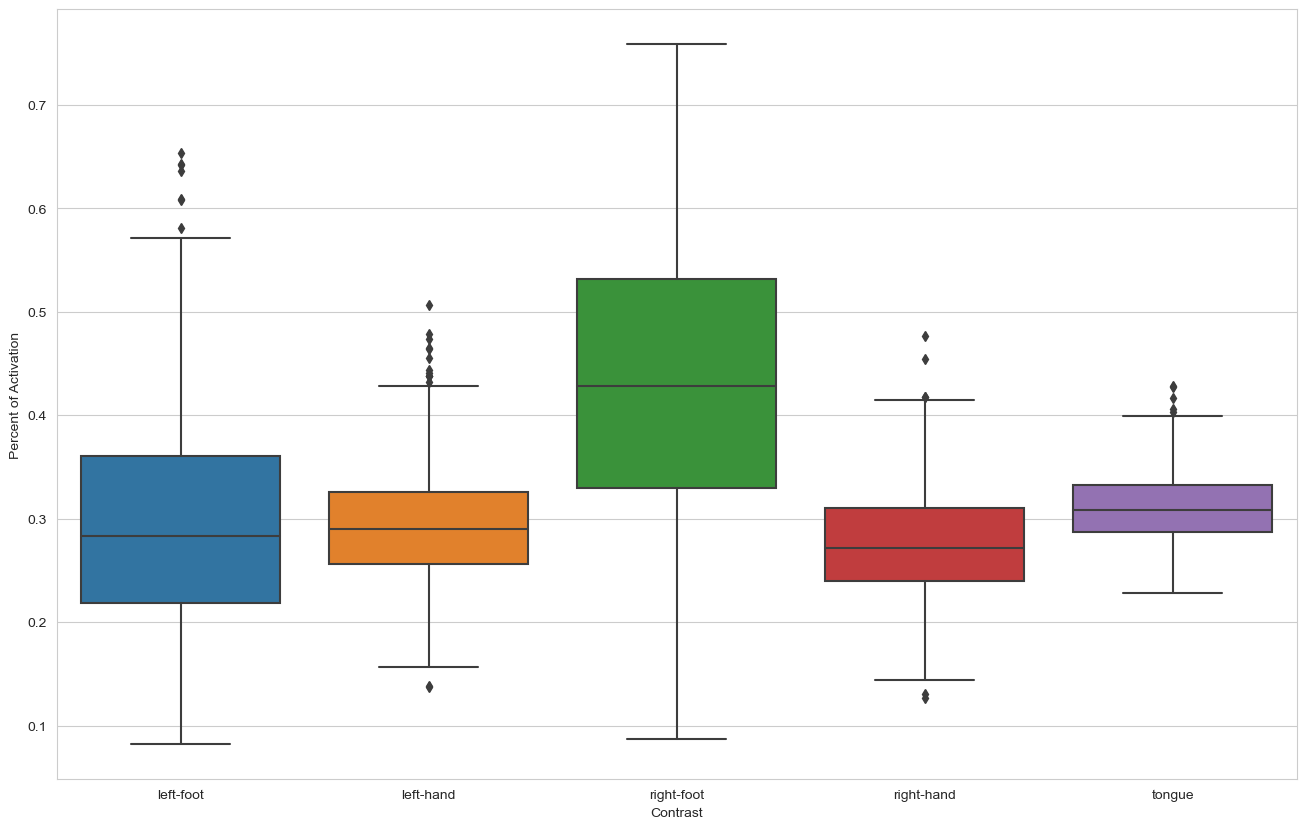

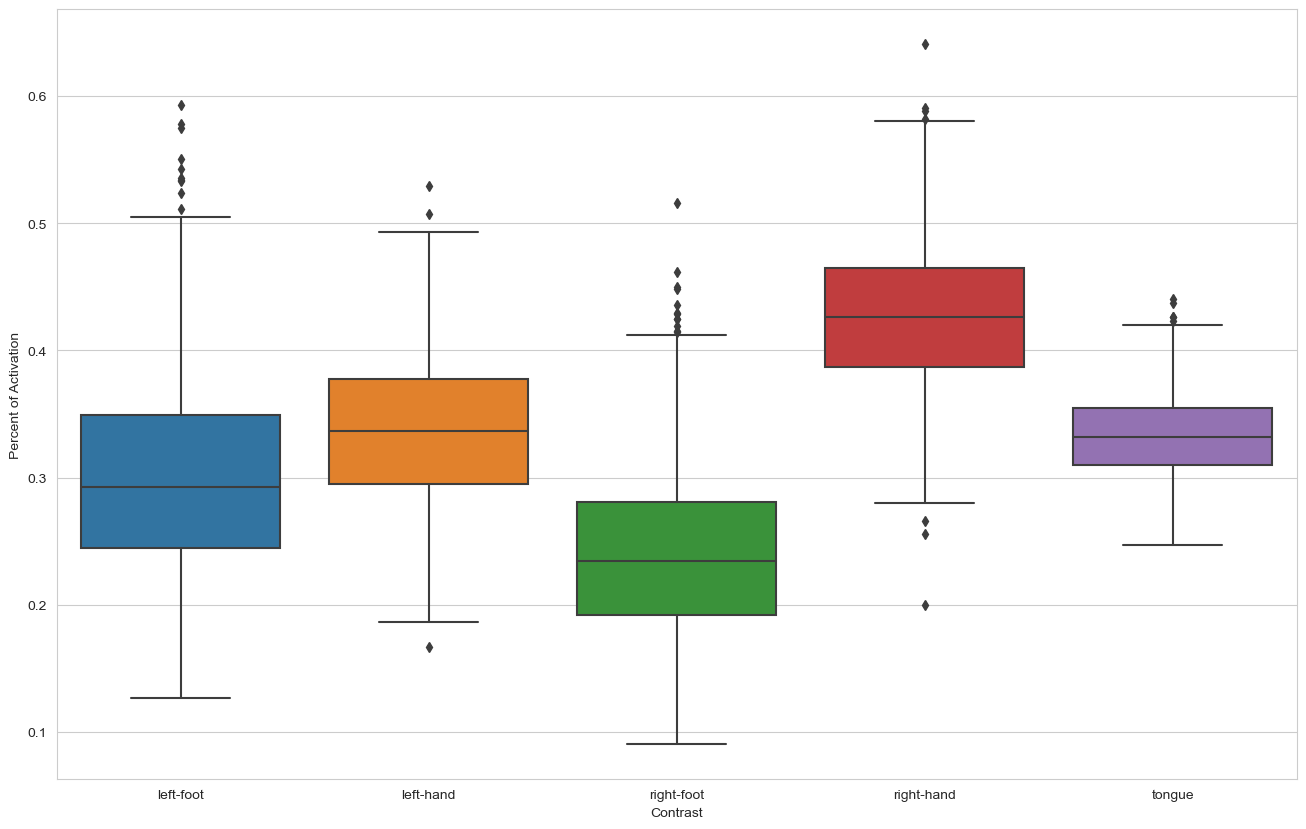

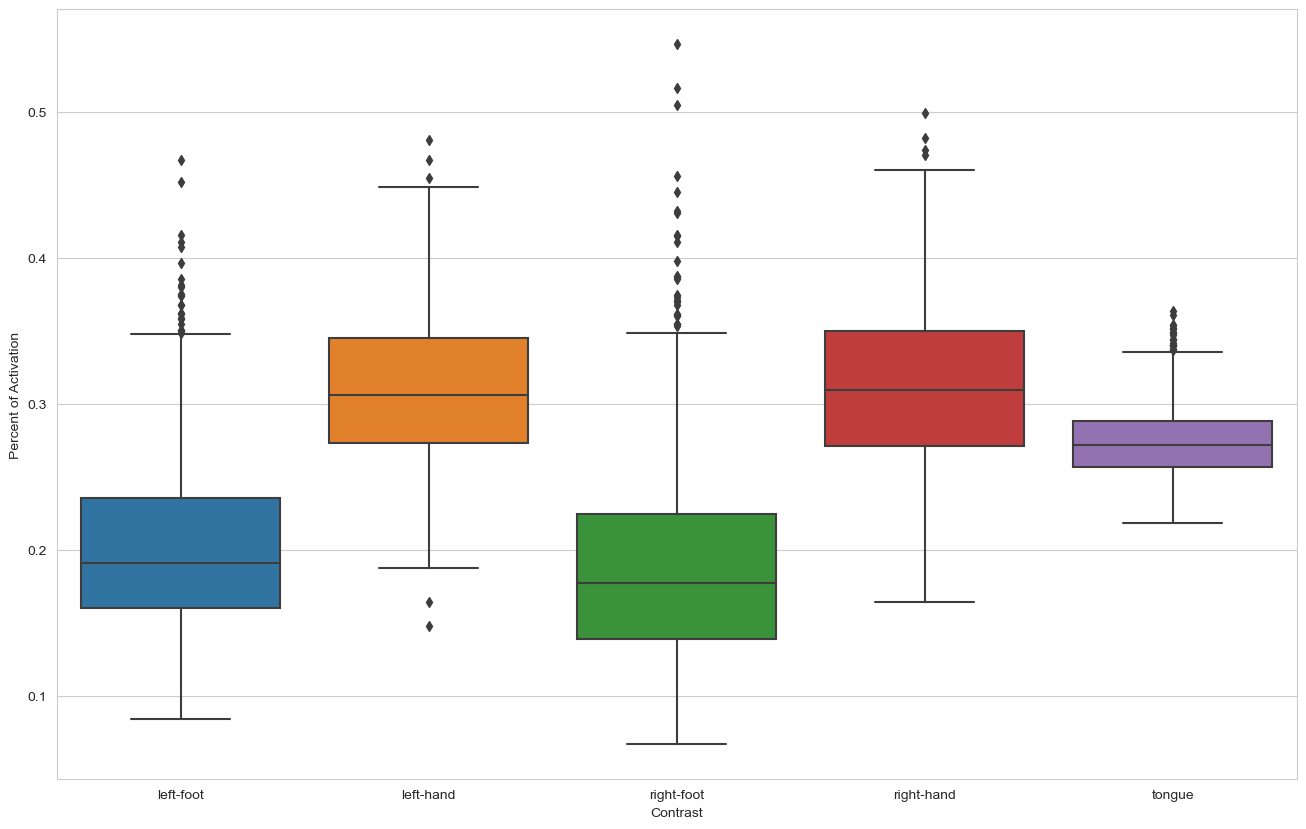

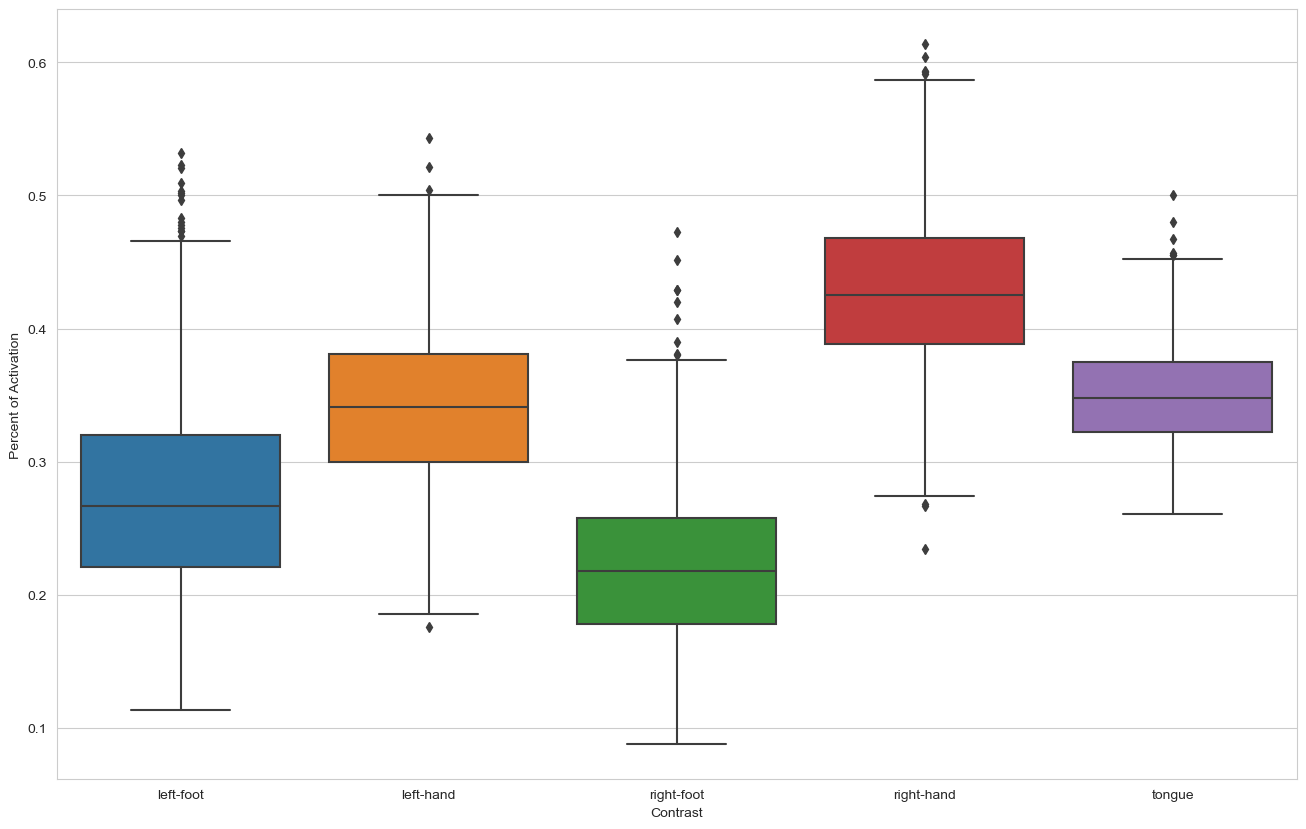

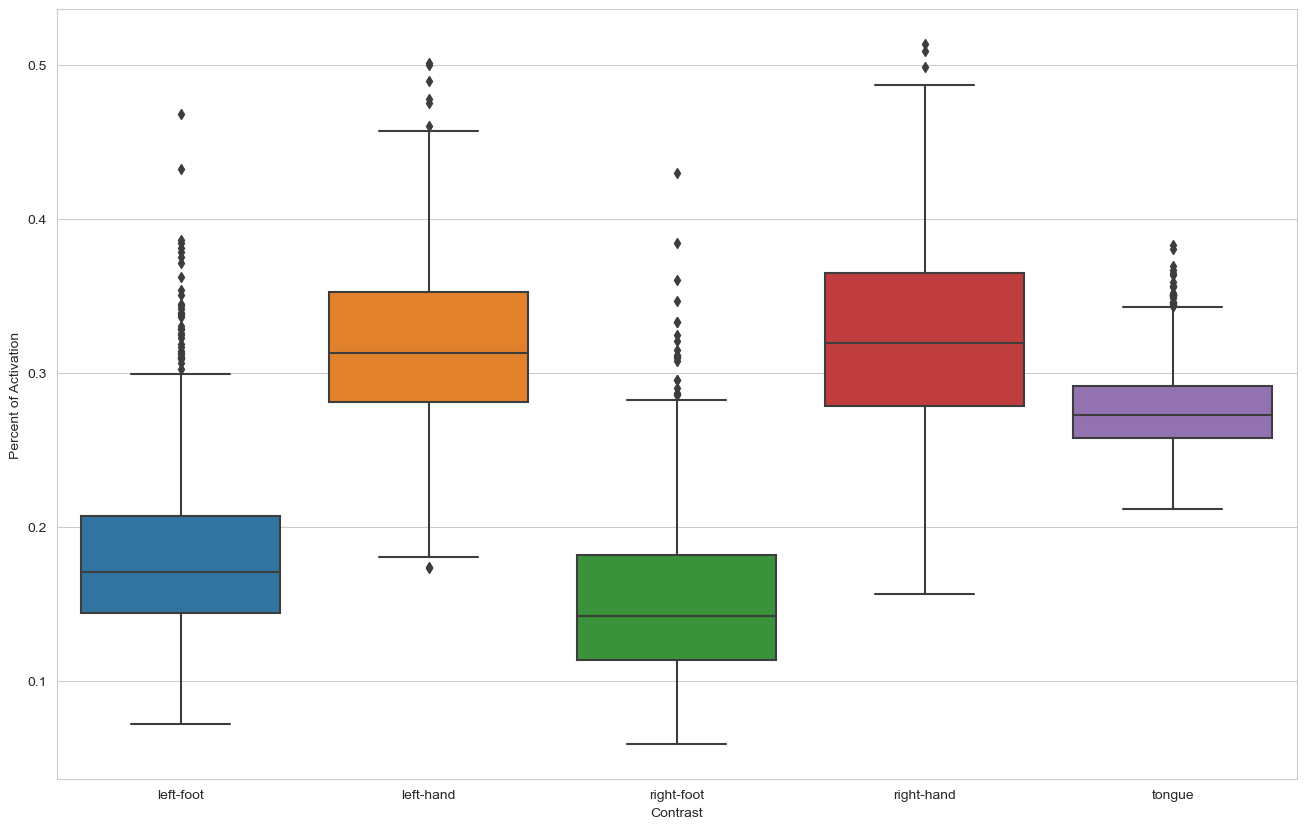

In [26]:
contrast_dict = {'lf':'left-foot', 'lh':'left-hand', 'rf':'right-foot', 'rh':'right-hand', 't':'tongue'}
for soft in ['FSL','SPM']:
    for f in [5,8]:
        for p in [0,6,24]:
            for h in [0,1]:
                df = pd.read_csv(f'{figure_path}/validation_{soft}_{f}_{p}_{h}_anat_roi.csv')
                df_fig=df
                df_fig.columns = ['ID','Name','Contrast','PO','Percent of Activation']
                df_fig = df[df['Contrast']!='cue']
                for con in ['lf','lh','rf','rh','t']:
                    df_fig['Contrast'][df_fig['Contrast']==con] = contrast_dict[con]
                    df_fig.columns = ['ID','Name','Contrast','PO','Percent of Activation']
                fig = plt.figure(figsize=(16,10))

                sns.set_style("whitegrid")
                sns.boxplot(data=df_fig, x="Contrast", y="Percent of Activation")
                plt.savefig(f'{figure_path}/validation_{soft}_{f}_{p}_{h}.png')